
<div style="text-align: center;">
  <img src="https://cdn.prod.website-files.com/65e3b115e37b4719332ddd06/676aaf1c8aa68541f08c06c1_Credit%20Card%20Fraud%20Detection%20Techniques.png" alt="t-SNE Visualization Example" width="800">
</p>

<div style="background-color: #fe6b47; padding: 20px; border-radius: 8px;">

**Warning**: Please note that the code provided in this document is not complete and may require further modifications to work in your specific environment. If you need the full and complete version of the code, please email your request to [n.etemadi888@gmail.com](mailto:n.etemadi888@gmail.com).


<div style="background-color: #cad5f5; padding: 20px; border-radius: 8px;">

# Fraud Detection in Financial Transactions

## Problem

Detecting fraudulent transactions is a critical yet challenging task in modern financial systems. With the rise of online transactions, fraudulent activities have become more frequent and sophisticated. Traditional supervised machine learning approaches require labeled datasets where fraudulent and legitimate transactions are explicitly identified. However, in real-world scenarios, such labeled data is often limited, highly imbalanced, or unavailable. This raises the need for unsupervised methods that can detect anomalies in the data without prior knowledge of labels. The primary challenge lies in accurately identifying fraudulent transactions while minimizing false positives and ensuring scalability for large datasets.

## Solution

To address this problem, we implemented and evaluated multiple unsupervised anomaly detection models for fraud detection. The models used include:

1. **Isolation Forest**: A tree-based model that isolates anomalies by randomly partitioning the data, detecting instances that require fewer splits to isolate.
2. **Local Outlier Factor (LOF)**: A density-based approach that identifies anomalies by comparing the local density of a data point to its neighbors.
3. **One-Class SVM**: A kernel-based method that learns a decision boundary around normal data points to detect outliers.
4. **Autoencoder**: A deep learning model that compresses input data into a lower-dimensional latent representation (encoder) and reconstructs it back (decoder). The reconstruction error is used as a measure of anomaly.

Each model was trained and evaluated on a dataset with highly imbalanced classes, where fraudulent transactions represent a small percentage of the total. Key techniques, such as percentile-based thresholds and modified Z-scores using the Median Absolute Deviation (MAD), were employed to identify anomalies from reconstruction errors or outlier scores. Additionally, the Autoencoder's latent space was visualized to better understand the separation between normal and fraudulent transactions.

## Results and Insights

The models were evaluated using metrics such as precision, recall, F1-score, and ROC-AUC to assess their ability to detect fraud. While all models achieved high accuracy due to the class imbalance, the more insightful metrics, such as recall and F1-score for fraudulent transactions, revealed the strengths and limitations of each approach:
- Isolation Forest achieved the highest recall (90%) but struggled with low precision due to false positives.
- LOF showed moderate recall (57%) but suffered from low precision.
- One-Class SVM performed the weakest overall, with low precision and recall.
- The Autoencoder demonstrated the potential for capturing complex patterns in the data and offered better insights when combined with visualization techniques.

By addressing the challenges of class imbalance and anomaly detection, this project highlights the potential of unsupervised learning for fraud detection. Future recommendations include leveraging ensemble models, improving latent space representation, and combining unsupervised methods with semi-supervised approaches for better performance in real-world scenarios.


# 
<a id="1"></a> 
# <p style="padding:15px;background-color:#45589c;margin:0;color:#f7f8fb;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:500">1. Import Libraries</p>  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

from numpy import quantile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn import linear_model
from sklearn.linear_model import SGDOneClassSVM

from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix,f1_score
import missingno as msno  
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, classification_report
import random as rn
import tensorflow as tf
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.pipeline import Pipeline
import warnings
from datetime import datetime
from sklearn.metrics import confusion_matrix, roc_curve, auc  

# 
<a id="1"></a> 
# <p style="padding:15px;background-color:#45589c;margin:0;color:#f7f8fb;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:500">2. Read data</p>  


In [2]:
# Loading the data
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
print(pd.Series({"Memory usage": "{:.2f} MB".format(data.memory_usage().sum()/(1024*1024)),
                 "Dataset shape": "{}".format(data.shape)}).to_string())
data.head()

Memory usage         67.36 MB
Dataset shape    (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 
<a id="1"></a> 
# <p style="padding:15px;background-color:#45589c;margin:0;color:#f7f8fb;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:500">3. Analysis of data</p>  


In [3]:
data.shape

(284807, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.describe().style.set_sticky(axis="index").background_gradient()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,88.349619,0.001727
std,47488.145955,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,1.088850,1.020713,0.999201,0.995274,0.958596,0.915316,0.876253,0.849337,0.838176,0.814041,0.770925,0.734524,0.725702,0.624460,0.605647,0.521278,0.482227,0.403632,0.330083,250.120109,0.041527
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54201.500000,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,-0.535426,-0.762494,-0.405571,-0.648539,-0.425574,-0.582884,-0.468037,-0.483748,-0.498850,-0.456299,-0.211721,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,5.600000,0.000000
50%,84692.000000,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,-0.092917,-0.032757,0.140033,-0.013568,0.050601,0.048072,0.066413,-0.065676,-0.003636,0.003735,-0.062481,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000000,0.000000
75%,139320.500000,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,0.453923,0.739593,0.618238,0.662505,0.493150,0.648821,0.523296,0.399675,0.500807,0.458949,0.133041,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,77.165000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


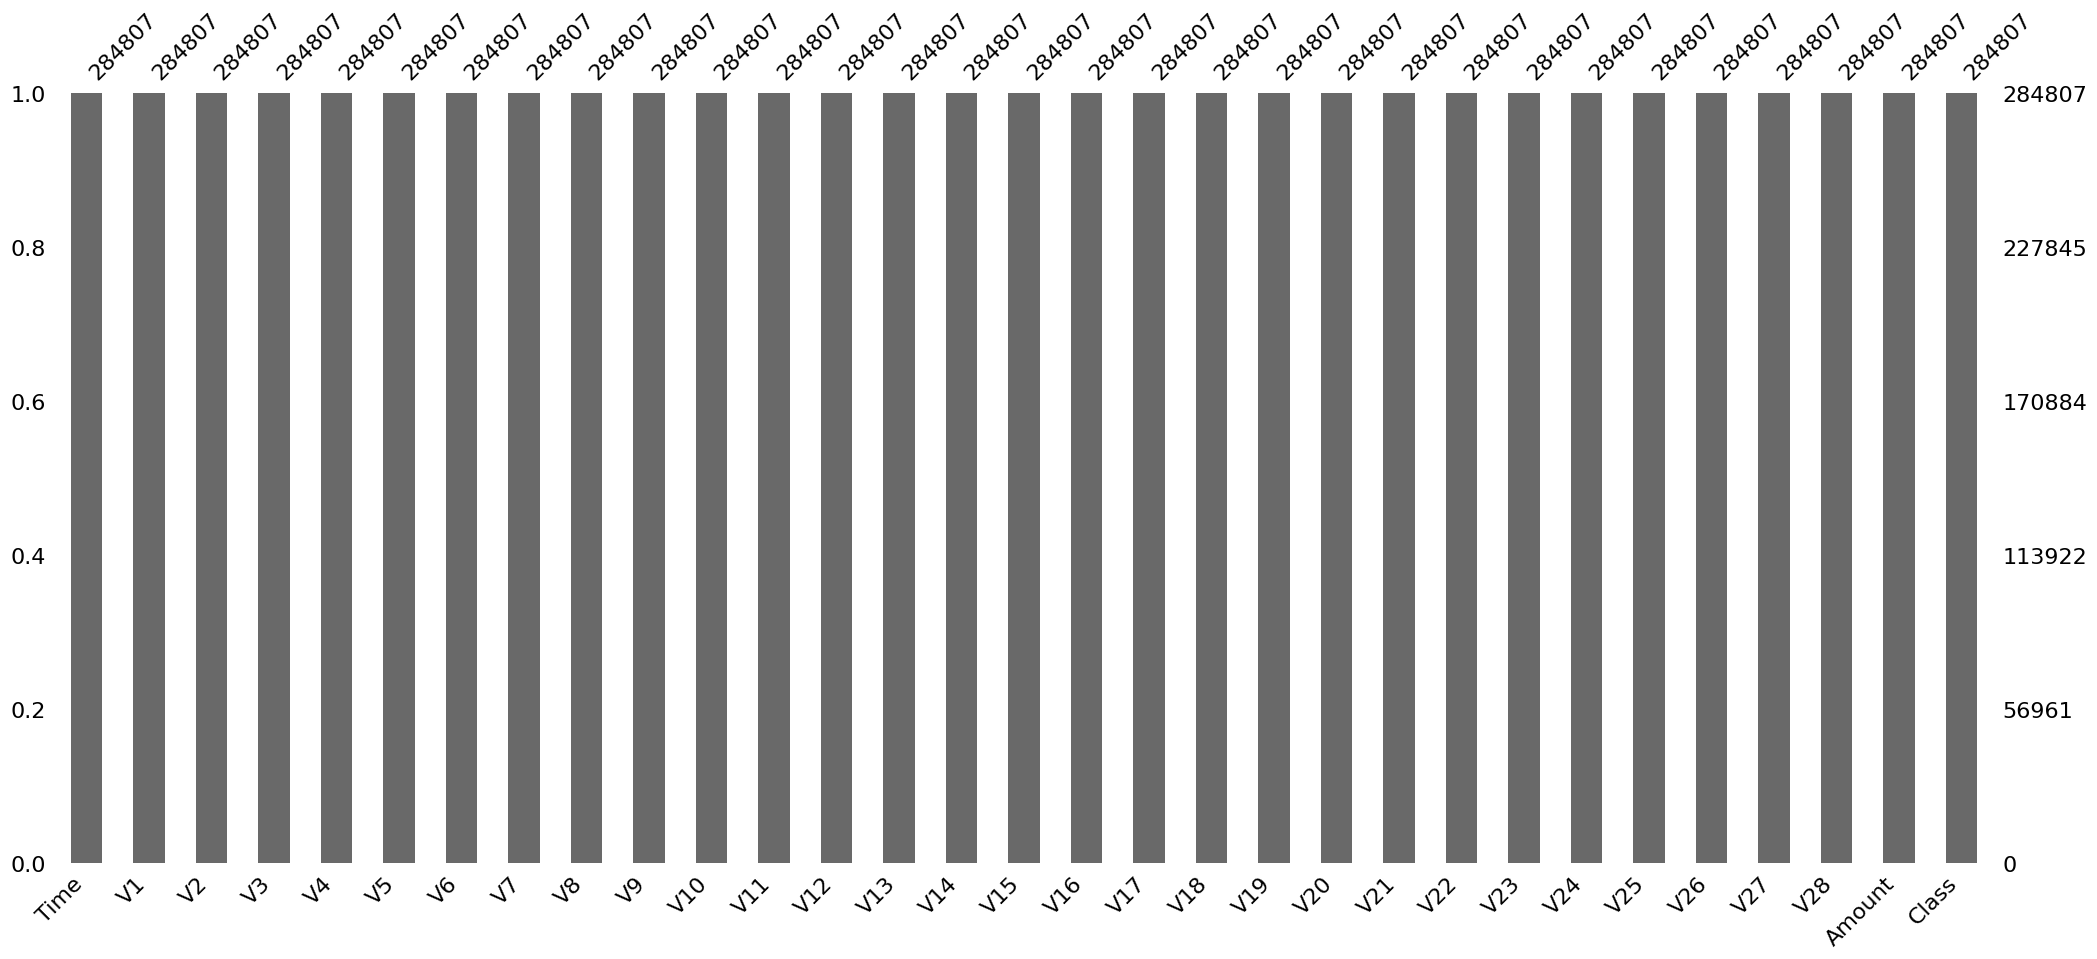

In [6]:

msno.bar(data)  
plt.show()  

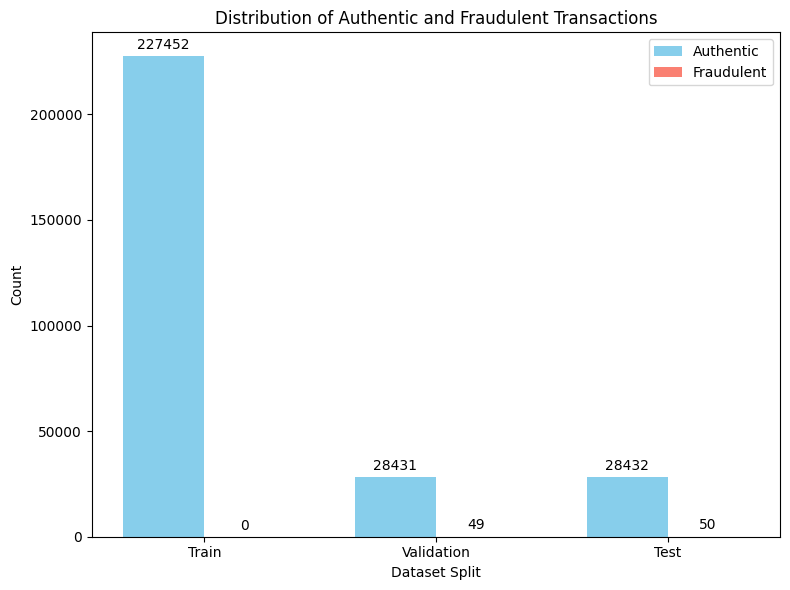

Training set size (authentic): 227452
Validation set size (authentic + fraudulent): 28480
Test set size (authentic + fraudulent): 28482


In [7]:
# Function to split data into train, validation, and test sets for both authentic and fraudulent transactions
def split_data_by_class(data, class_label):
    # Filter data by class
    class_data = data[data['Class'] == class_label]
    X, y = class_data.drop('Class', axis=1), class_data['Class']
    
    # Split into train, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=40)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=40)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

# Splitting the data for both authentic (Class = 0) and fraudulent (Class = 1) transactions
X_train_auth, X_val_auth, X_test_auth, y_train_auth, y_val_auth, y_test_auth = split_data_by_class(data, 0)
X_train_fraud, X_val_fraud, X_test_fraud, y_train_fraud, y_val_fraud, y_test_fraud = split_data_by_class(data, 1)

# Merging the validation and test sets for both classes
X_val = pd.concat([X_val_auth, X_val_fraud], axis=0)
y_val = pd.concat([y_val_auth, y_val_fraud], axis=0)
X_test = pd.concat([X_test_auth, X_test_fraud], axis=0)
y_test = pd.concat([y_test_auth, y_test_fraud], axis=0)
# Data for the bar chart
labels = ['Train', 'Validation', 'Test']
authentic_counts = [
    len(y_train_auth[y_train_auth == 0]),
    len(y_val[y_val == 0]),
    len(y_test[y_test == 0])
]
fraudulent_counts = [
    len(y_train_auth[y_train_auth == 1]),
    len(y_val[y_val == 1]),
    len(y_test[y_test == 1])
]

# Setting up bar chart positions
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Creating the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - width/2, authentic_counts, width, label='Authentic', color='skyblue')
bars2 = ax.bar(x + width/2, fraudulent_counts, width, label='Fraudulent', color='salmon')

# Adding titles and labels
ax.set_xlabel('Dataset Split')
ax.set_ylabel('Count')
ax.set_title('Distribution of Authentic and Fraudulent Transactions')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Adding value annotations on the bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Display the bar chart
plt.tight_layout()
plt.show()

# Output results for verification
print(f"Training set size (authentic): {X_train_auth.shape[0]}")
print(f"Validation set size (authentic + fraudulent): {X_val.shape[0]}")
print(f"Test set size (authentic + fraudulent): {X_test.shape[0]}")


<div style="background-color: #cad5f5; padding: 20px; border-radius: 8px;">

This code splits the dataset into training, validation, and test sets for both authentic and fraudulent credit card transactions. It then visualizes the distribution of authentic and fraudulent transactions across these sets using pie charts. The output shows that the training set contains 227,452 authentic transactions, while the validation and test sets have a balanced distribution of 28,480 and 28,482 samples, respectively, including both classes.


# 
<a id="1"></a> 
# <p style="padding:15px;background-color:#45589c;margin:0;color:#f7f8fb;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:500">4 .Exploratory Analysis (EDA)</p>  


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


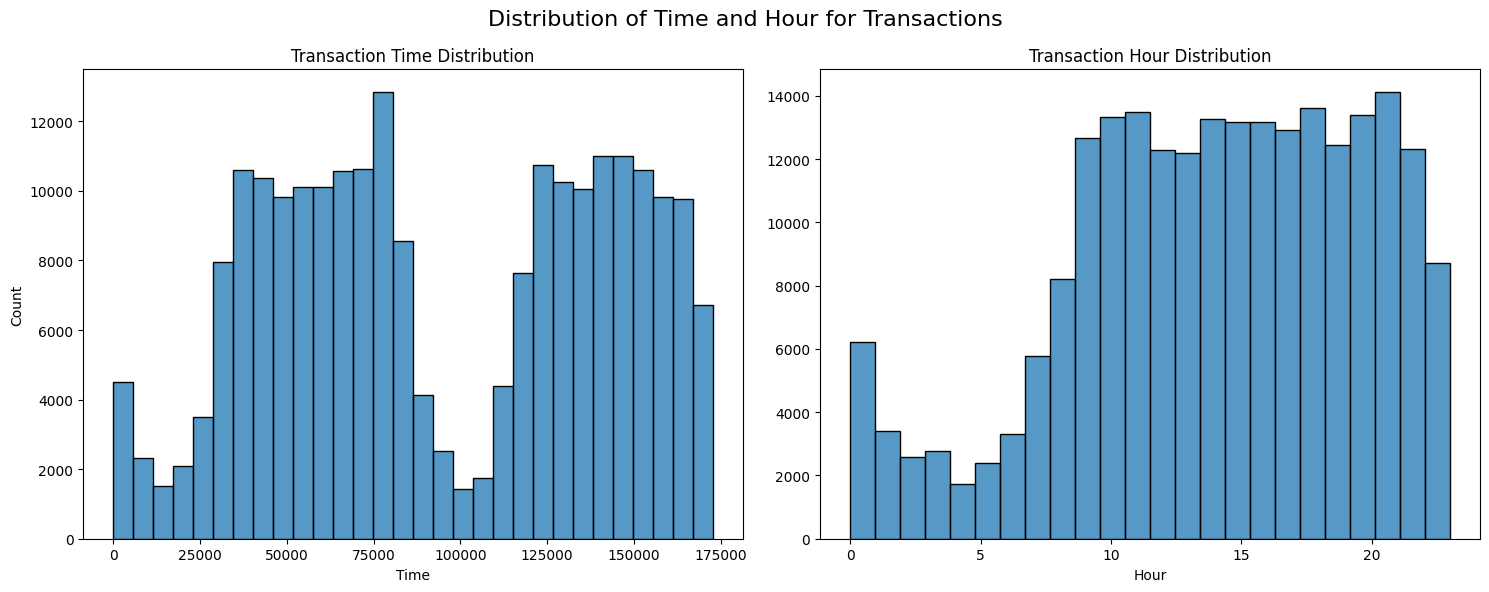

In [8]:
# Decompose 'Time' into Day, Hour, Minute, and Second
def decompose_time(data):
    # Calculate day, hour, minute, and second components
    data['Day'], temp = divmod(data['Time'], 24*60*60)
    data['Hour'], temp = divmod(temp, 60*60)
    data['Minute'], data['Second'] = divmod(temp, 60)

# Apply decomposition to the datasets (use appropriate variables from your split data)
decompose_time(X_train_auth)
decompose_time(X_val)
decompose_time(X_test)

# Preview the decomposition of the 'Time' column in the training dataset
X_train_auth[['Time', 'Day', 'Hour', 'Minute', 'Second']].head()

# Plotting: Histograms of 'Time' and 'Hour'
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=False)

# Histogram for 'Time' feature
sns.histplot(data=X_train_auth, x='Time', bins=30, ax=ax[0])
ax[0].set_title("Transaction Time Distribution")

# Histogram for 'Hour' feature
sns.histplot(data=X_train_auth, x='Hour', bins=24, ax=ax[1])
ax[1].set_title("Transaction Hour Distribution")
ax[1].set_ylabel("")  # Remove the redundant ylabel for the second plot

# Adjust the layout and show the plot
plt.suptitle("Distribution of Time and Hour for Transactions", size=16)
plt.tight_layout()
plt.show()


In [9]:
# Discarding unnecessary columns from training, validation, and test sets
for data in [X_train_auth, X_val, X_test]:
    data.drop(['Time', 'Day', 'Minute', 'Second', 'Amount'], axis=1, inplace=True)


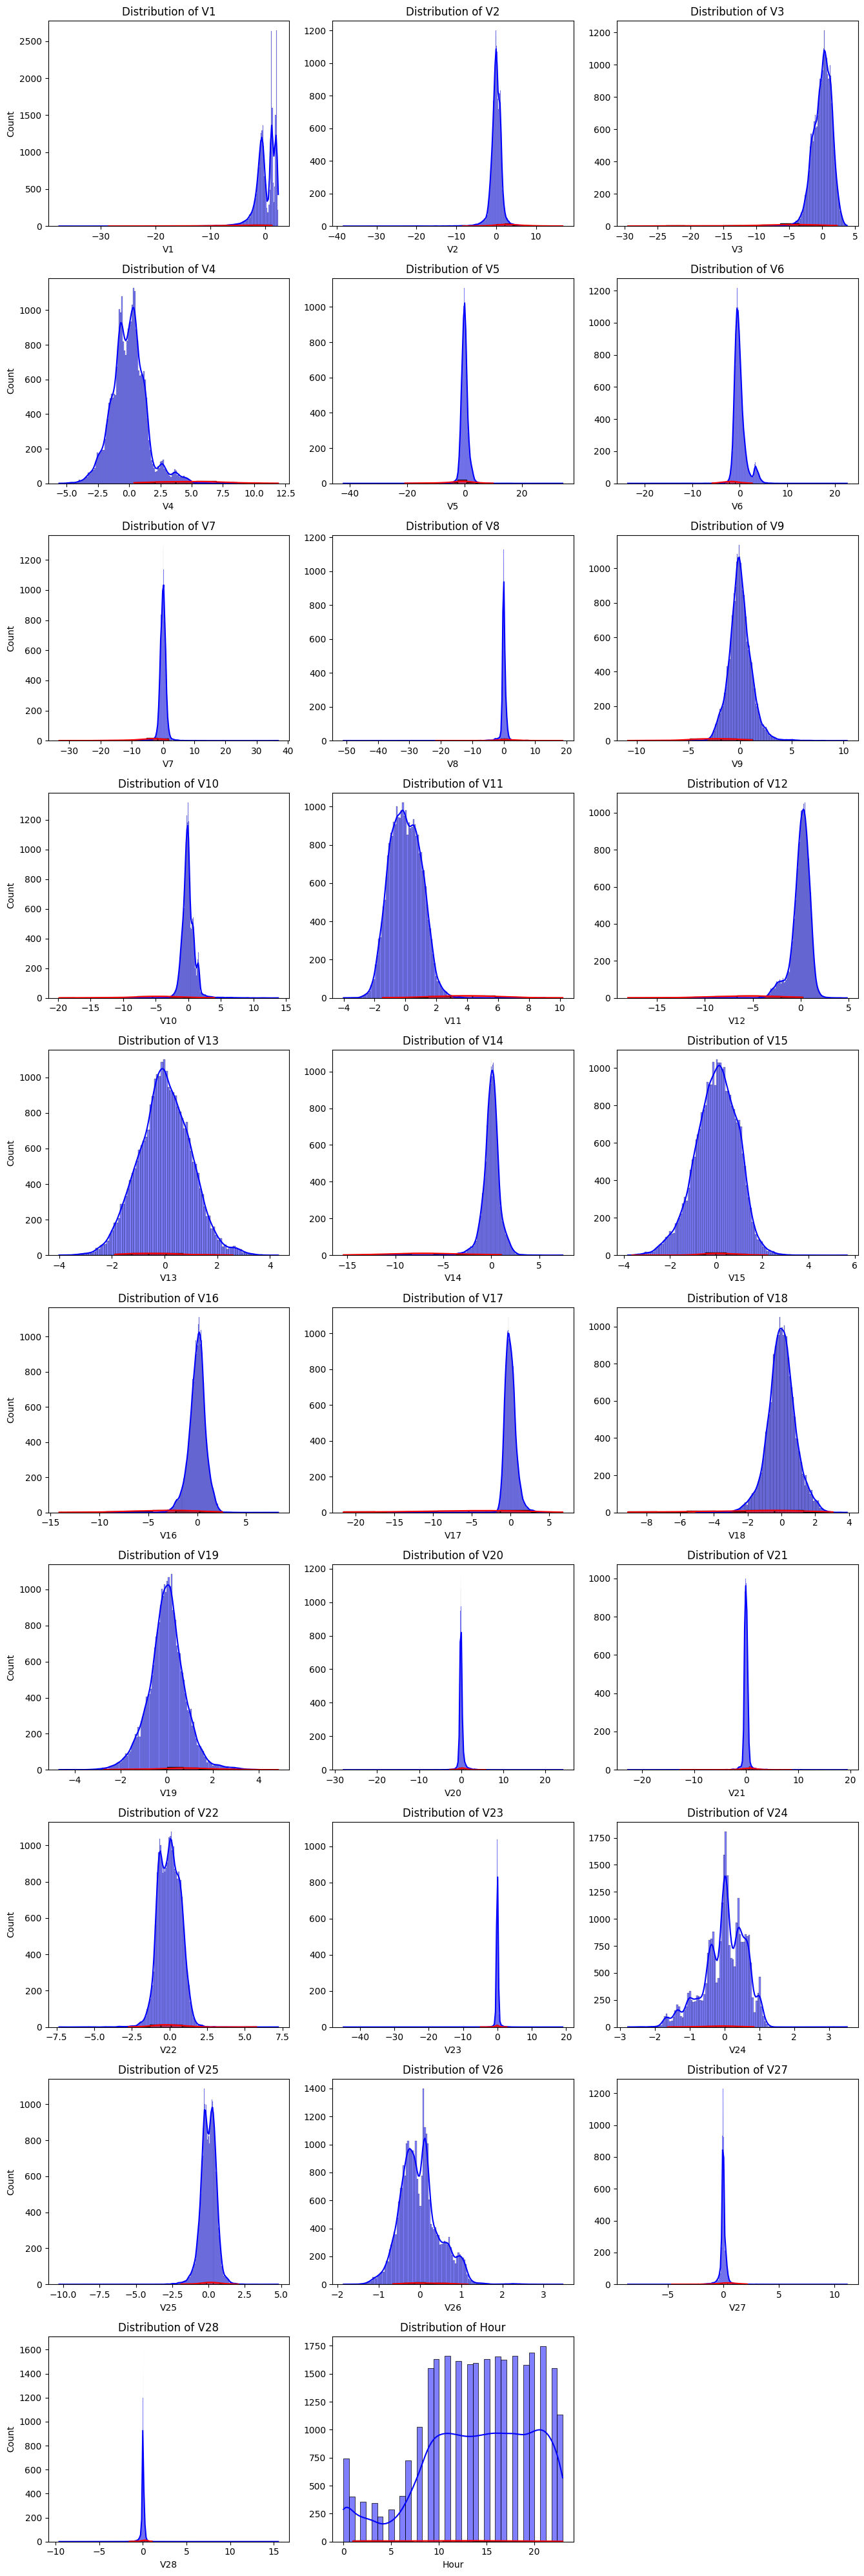

In [10]:

# Suppress specific FutureWarning related to Seaborn
warnings.simplefilter(action='ignore', category=FutureWarning)
# Concatenate validation data with target labels (Class)
data_val = pd.concat([X_val, y_val], axis=1)

# Split data into authentic (Class = 0) and fraudulent (Class = 1) transactions
authentic_data = data_val[data_val['Class'] == 0]
fraudulent_data = data_val[data_val['Class'] == 1]

# List of feature columns to plot
feature_columns = list(X_val.columns)

# Calculate number of rows and columns for the subplots grid
ncols = 3
nrows = math.ceil(len(feature_columns) / ncols)

# Create the subplots
fig, ax = plt.subplots(nrows, ncols, figsize=(4.5 * ncols, 4 * nrows))

# Flatten the axes array for easier indexing (to handle multi-row, multi-column)
ax = ax.flatten()

# Loop through each feature column to plot KDE for both classes
for i, feature in enumerate(feature_columns):
    sns.histplot(authentic_data[feature], ax=ax[i], kde=True, label='Authentic', color='blue')
    sns.histplot(fraudulent_data[feature], ax=ax[i], kde=True, label='Fraudulent', color='red')
    
    # Set titles and remove redundant y-axis labels
    ax[i].set_title(f'Distribution of {feature}')
    if i % ncols != 0:
        ax[i].set_ylabel('')

# Remove empty subplots if any (if there are more subplots than features)
for i in range(len(feature_columns), len(ax)):
    fig.delaxes(ax[i])

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


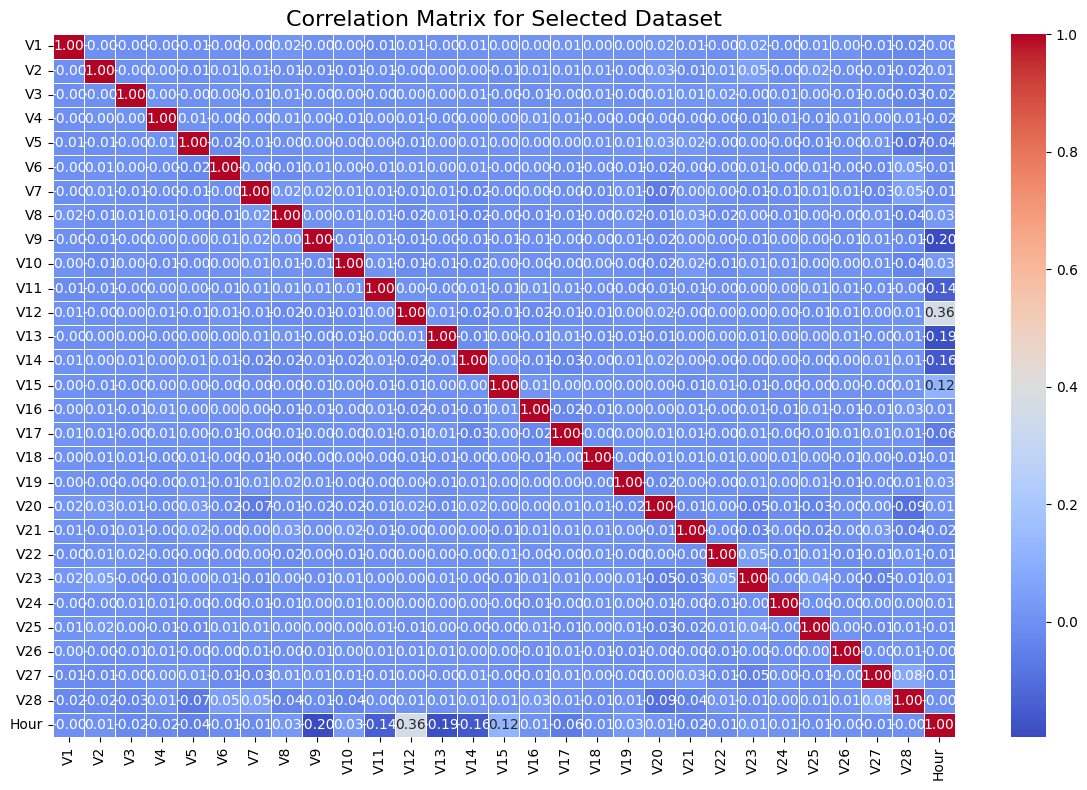

In [11]:
# Select the dataset you want to plot the correlation matrix for (X_train, X_val, X_test)
data_to_plot = X_val  

# Compute the correlation matrix
correlation_matrix = data_to_plot.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix for Selected Dataset", size=16)
plt.tight_layout()
plt.show()



# 
<a id="1"></a> 
# <p style="padding:15px;background-color:#45589c;margin:0;color:#f7f8fb;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:500">5 .Models</p>  


In [12]:

# Get all the columns from the X_val dataframe
columns = X_val.columns.tolist()

# Filter the columns to remove 'Class' as it is not part of the features
columns = [c for c in columns if c not in ["Class"]]

# Store the variable we are predicting (Target column)
target = "Class"
X = X_val[columns]  # Use X_val for outlier detection
Y = y_val  # Use the corresponding target (y_val)

# Define a random state for reproducibility
state = np.random.RandomState(42)

# Initialize classifiers for outlier detection
classifiers = {
    "Isolation Forest": IsolationForest(n_estimators=100, max_samples='auto', 
                                       contamination=0.05, random_state=state, verbose=0),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=0.05),
    "Support Vector Machine": OneClassSVM(kernel='rbf', degree=3, gamma=0.1, nu=0.05, 
                                         max_iter=-1)  # No random_state here
}

# Run each classifier and evaluate performance
for clf_name, clf in classifiers.items():
    # Ensure we pass data with feature names (DataFrame, not NumPy array)
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)  # Predictions are -1 (outlier) and 1 (inlier)
        scores_prediction = clf.negative_outlier_factor_  # Score for each point
    elif clf_name == "Support Vector Machine":
        clf.fit(X)  # Fit the model
        y_pred = clf.predict(X)  # Prediction: 1 for normal, -1 for outlier
    else:    
        clf.fit(X)  # Fit the Isolation Forest model
        scores_prediction = clf.decision_function(X)  # Get decision function values
        y_pred = clf.predict(X)  # 1 for normal, -1 for outlier
    
    # Reshape predictions (convert to 0 for normal and 1 for outlier)
    y_pred[y_pred == 1] = 0  # Normal transactions = 0
    y_pred[y_pred == -1] = 1  # Outliers = 1
    
    # Calculate the number of errors (where prediction differs from actual label)
    n_errors = (y_pred != Y).sum()
    
    # Display the metrics
    print(f"{clf_name}: {n_errors} errors")
    print("Accuracy Score:")
    print(accuracy_score(Y, y_pred))
    print("Classification Report:")
    print(classification_report(Y, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 1385 errors
Accuracy Score:
0.9513693820224719
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     28431
           1       0.03      0.90      0.06        49

    accuracy                           0.95     28480
   macro avg       0.52      0.92      0.52     28480
weighted avg       1.00      0.95      0.97     28480

Local Outlier Factor: 1417 errors
Accuracy Score:
0.950245786516854
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     28431
           1       0.02      0.57      0.04        49

    accuracy                           0.95     28480
   macro avg       0.51      0.76      0.51     28480
weighted avg       1.00      0.95      0.97     28480

Support Vector Machine: 2450 errors
Accuracy Score:
0.9139747191011236
Classification Report:
              precision    recall  f1-score   support

           0      

<div style="background-color: #cad5f5; padding: 20px; border-radius: 8px;">
    
# Outlier Detection Models for Fraudulent Transaction Detection

This document describes the results of using three different outlier detection models to classify transactions as either **authentic (class 0)** or **fraudulent (class 1)**. These models are used in an unsupervised setting, meaning they attempt to identify anomalies (fraudulent transactions) without knowing the class labels during training.

### Models Used:
1. **Isolation Forest**
2. **Local Outlier Factor (LOF)**
3. **Support Vector Machine (One-Class SVM)**

### Results:
The following are the results of applying each model to the dataset. The models were evaluated based on **accuracy**, **precision**, **recall**, and **F1-score** for both **authentic (class 0)** and **fraudulent (class 1)** transactions.

---

## 1. **Isolation Forest**

- **Errors**: 1385 misclassified instances.
- **Accuracy**: 95.1%
- **Precision, Recall, F1-Score** (for Class 1: Fraudulent transactions):
  - **Precision**: 0.03
  - **Recall**: 0.90
  - **F1-Score**: 0.06

#### Interpretation:
- **Precision for Fraudulent transactions** is very low, meaning that the model predicted very few fraudulent transactions correctly.
- **Recall for Fraudulent transactions** is high, meaning that the model successfully identified a majority of fraudulent transactions but missed many others.
- Overall, while the accuracy is high, **Isolation Forest** is struggling to detect fraud effectively.

---

## 2. **Local Outlier Factor (LOF)**

- **Errors**: 1417 misclassified instances.
- **Accuracy**: 95.0%
- **Precision, Recall, F1-Score** (for Class 1: Fraudulent transactions):
  - **Precision**: 0.02
  - **Recall**: 0.57
  - **F1-Score**: 0.04

#### Interpretation:
- Similar to **Isolation Forest**, **LOF** has a **low precision** for fraudulent transactions, meaning it predicts most frauds as normal.
- However, it does have a somewhat better **recall** for fraudulent transactions (57%), meaning it detects a larger proportion of fraudulent transactions.
- Despite the high accuracy, **LOF** also struggles in identifying fraudulent transactions effectively.

---

## 3. **Support Vector Machine (One-Class SVM)**

- **Errors**: 2450 misclassified instances.
- **Accuracy**: 91.4%
- **Precision, Recall, F1-Score** (for Class 1: Fraudulent transactions):
  - **Precision**: 0.01
  - **Recall**: 0.41
  - **F1-Score**: 0.02

#### Interpretation:
- **Precision for Fraudulent transactions** is extremely low (0.01), which means the model incorrectly predicted most fraudulent transactions as normal.
- **Recall for Fraudulent transactions** is better than precision (0.41), but it still misses a large proportion of fraudulent transactions.
- The model has the lowest accuracy among the three models, but like the others, it tends to miss fraudulent transactions.

---

### Summary of Key Points:

- **High accuracy** across all three models (around 95%) is misleading due to **class imbalance**. Since fraudulent transactions (class 1) are rare, the models are predominantly classifying most transactions as normal (class 0).
- **Low precision and F1-score** for class 1 (fraudulent transactions) indicates that the models fail to effectively detect fraud.
- **Recall** for fraud detection varies, with **Isolation Forest** having the highest recall at 90%, but all models still struggle with detecting the small number of fraudulent transactions.
  
---

### Recommendations:

- **Class Balancing**: To improve detection of fraudulent transactions, consider techniques like **oversampling** the minority class (fraud) using methods such as **SMOTE** or **undersampling** the majority class (normal).
- **Use Alternative Metrics**: Evaluate models using metrics like **Precision-Recall curves**, **ROC-AUC**, and **F1 score** for class 1 instead of relying solely on accuracy.
- **Try Ensemble Methods**: Using ensemble-based anomaly detection methods might improve performance in detecting fraud.

---

### Conclusion:

All three models demonstrate high accuracy due to the class imbalance but fail to effectively detect fraudulent transactions. Addressing the imbalance and experimenting with other techniques could improve the results significantly.


# 
<a id="1"></a> 
# <p style="padding:15px;background-color:#45589c;margin:0;color:#f7f8fb;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:500">6. AutoEncoders</p>  


<div style="background-color: #cad5f5; padding: 20px; border-radius: 8px;">

# Introduction to AutoEncoders

AutoEncoders are neural networks designed to copy inputs to outputs by learning compressed representations of data. They use unsupervised learning with backpropagation and minimize the same objective as PCA, but handle non-linear data better. Key points:

1. Unsupervised ML algorithm, similar to PCA.
2. Minimizes PCA's objective function.
3. Target output is the input.

---

## Why Use AutoEncoders?

Unlike PCA, AutoEncoders:
- Handle **non-linear transformations** with activation functions and layers.
- Use **CNN/LSTM** layers for better feature extraction.
- Provide **higher efficiency** in learning parameters.
- Offer **multiple representations**, aiding transfer learning.

---

## Components of AutoEncoders

1. **Encoder**: Compresses input into a latent space.
2. **Code**: Bottleneck layer representing the compressed input.
3. **Decoder**: Reconstructs input from the latent space.

---

## Properties

- **Unsupervised**: No labels required for training.
- **Data-Specific**: Only works well with data similar to training data.
- **Lossy Compression**: Decompressed output slightly degrades.

---


![AutoEncoder Architecture](https://editor.analyticsvidhya.com/uploads/74224architecture_AutoEncoder.png)


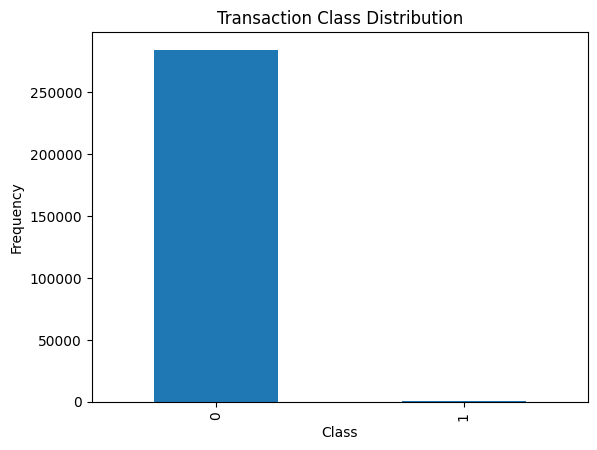

Total Number of Frauds: 492
Total Number of Normal Transactions: 284315


In [13]:
# Load the data
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

# Count and visualize transaction classes
count_classes = data['Class'].value_counts()
count_classes.plot(kind='bar', title="Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

# Calculate and display the number of fraud and normal transactions
fraud_count = count_classes.get(1, 0)
normal_count = count_classes.get(0, 0)

print(f"Total Number of Frauds: {fraud_count}")
print(f"Total Number of Normal Transactions: {normal_count}")


In [14]:
# manual parameters
RANDOM_SEED = 42
TRAINING_SAMPLE = 200000
VALIDATE_SIZE = 0.2

# setting random seeds for libraries to ensure reproducibility
np.random.seed(RANDOM_SEED)
rn.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)  # Correct function for TensorFlow 2.x


In [15]:
# let's quickly convert the columns to lower case and rename the Class column 
# so as to not cause syntax errors
data.columns = map(str.lower, data.columns)
data.rename(columns={'class': 'label'}, inplace=True)

# print first 5 rows to get an initial impression of the data we're dealing with
data.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,label
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
# Calculate the number of fraud cases
fraud_count = data[data['label'] == 1].shape[0]

# Calculate the total number of transactions
total_count = data.shape[0]

# Calculate the percentage of fraud cases
fraud_percentage = (fraud_count / total_count) * 100

# Print the result
print(f"Percentage of Fraud Cases: {fraud_percentage:.2f}%")


Percentage of Fraud Cases: 0.17%


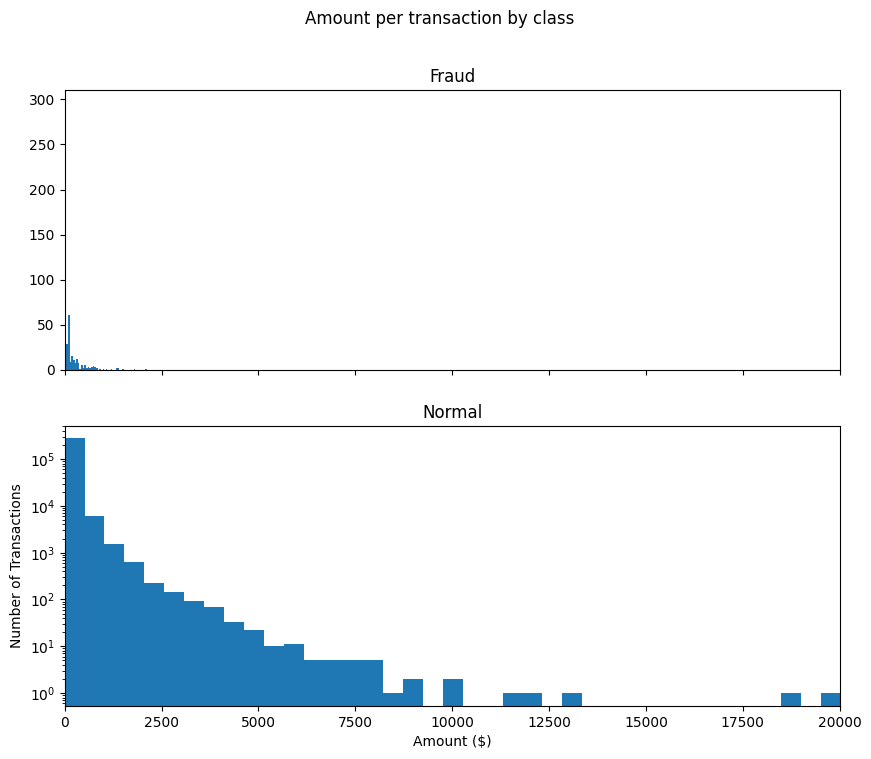

In [17]:
# Separate the data into fraud and normal transactions
fraud = data[data['label'] == 1]
normal = data[data['label'] == 0]
# add a negligible amount to avoid taking the log of 0
data['log10_amount'] = np.log10(data.amount + 0.00001)
# Create subplots
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))
f.suptitle('Amount per transaction by class')

# Number of bins for histograms
bins = 50

# Plot histograms for fraud transactions
ax1.hist(fraud['amount'], bins=bins)
ax1.set_title('Fraud')

# Plot histograms for normal transactions
ax2.hist(normal['amount'], bins=bins)
ax2.set_title('Normal')

# Set labels and axis properties
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))  # Set x-axis limits for better visualization
plt.yscale('log')  # Use log scale for y-axis

# Show the plot
plt.show()


In [18]:
# keep the label field at the back
data = data[
    [col for col in data if col not in ['label', 'log10_amount']] + 
    ['log10_amount', 'label']
]

## 
<a id="1"></a> 
# <p style="padding:15px;background-color:#45589c;margin:0;color:#f7f8fb;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:500">6.1 Clusters with t-SNE</p>  


<div style="background-color: #cad5f5; padding: 20px; border-radius: 8px;">

## Visualizing Clusters with t-SNE

**t-Distributed Stochastic Neighbor Embedding (t-SNE)** is a powerful technique for visualizing high-dimensional data. Below is an explanation inspired by the scikit-learn documentation:

> t-SNE is designed to convert similarities between data points into joint probabilities. It then minimizes the Kullback-Leibler divergence between these joint probabilities in the high-dimensional space and the lower-dimensional embedding. However, since its cost function is non-convex, different initializations can lead to varying results.

### In simpler terms:
t-SNE is a dimensionality reduction method commonly used for visualizing complex datasets. It maps high-dimensional clusters onto a two- or three-dimensional plane, making it easier to observe how well-separated different classes or clusters are. 

t-SNE works by trying to preserve the relative distances between points. Points that are close together in high-dimensional space are kept close in the lower-dimensional visualization. This makes it an excellent tool for exploring and interpreting the structure of complex datasets, particularly when working with clustering tasks or identifying patterns.

---

![t-SNE Visualization Example](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*gjhEXfy5r3L4S1ZYlBYdKw.png)


---

### What is t-SNE?
Many of you have already heard about dimensionality reduction algorithms like PCA. One of these algorithms is called **t-SNE** (t-distributed Stochastic Neighbor Embedding), developed by Laurens van der Maaten and Geoffrey Hinton in 2008.

You might ask, *“Why should I even care? I already know PCA!”* That’s a great question. Unlike PCA, t-SNE is a **nonlinear dimensionality reduction technique**, making it particularly useful for visualizing data with complex relationships that cannot be captured by linear methods.

---




In [19]:
# Define the ratio of clean to fraud transactions for undersampling
RATIO_TO_FRAUD = 15

# Drop redundant columns that are not needed for the analysis
data = data.drop(['time', 'amount'], axis=1)

# Split the dataset into fraud and clean transactions based on the label
fraud = data[data.label == 1]  # Transactions labeled as fraud.label == 1]  # Transactions labeled as fraud
clean = data[data.label == 0]  # Transactions labeled as clean

# Perform undersampling on clean transactions to balance the dataset
clean_undersampled = clean.sample(
    n=int(len(fraud) * RATIO_TO_FRAUD),  # Maintain the specified fraud-to-clean ratio
    random_state=RANDOM_SEED  # Ensure reproducibility
)

# Combine the undersampled clean transactions with all fraud transactions
visualisation_initial = pd.concat([fraud, clean_undersampled])

# Extract the column names of the features (excluding the label column)
column_names = list(visualisation_initial.drop('label', axis=1).columns)

# Separate features (X) and labels (y) for model input
features = visualisation_initial.drop('label', axis=1).values  # Feature matrix
labels = visualisation_initial.label.values  # Target labels


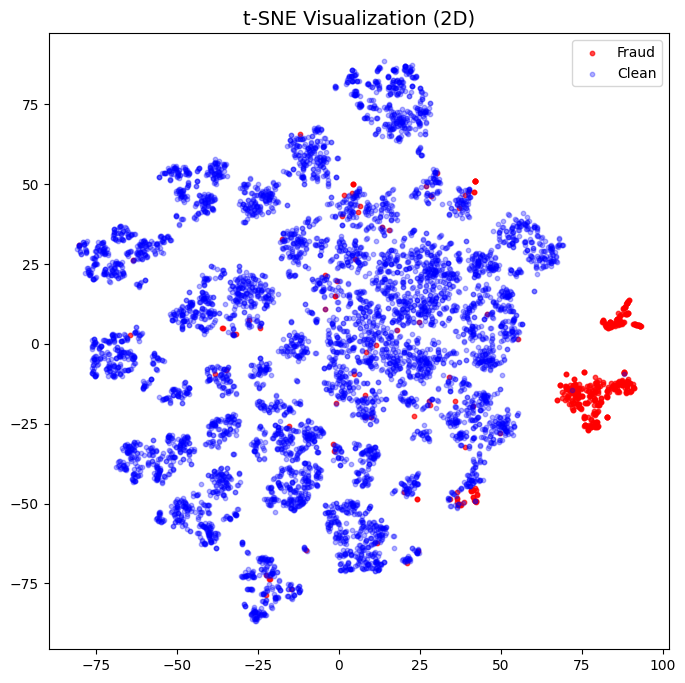

In [20]:

def tsne_scatter(features, labels, dimensions=2, save_as='graph.png'):
    """
    Visualize high-dimensional data using t-SNE with support for 2D and 3D plots.

    Args:
        features (np.ndarray): High-dimensional feature matrix.
        labels (np.ndarray): Corresponding labels for the data points.
        dimensions (int): Number of dimensions for visualization (2 or 3).
        save_as (str): File name to save the plot.

    Raises:
        ValueError: If dimensions is not 2 or 3.
    """
    # Validate the dimensions parameter
    if dimensions not in (2, 3):
        raise ValueError(
            "tsne_scatter can only plot in 2D or 3D. "
            "Make sure the 'dimensions' argument is either 2 or 3."
        )

    # Apply t-SNE dimensionality reduction
    features_embedded = TSNE(n_components=dimensions, random_state=RANDOM_SEED).fit_transform(features)

    # Initialize the plot
    fig = plt.figure(figsize=(8, 8))
    if dimensions == 3:
        ax = fig.add_subplot(111, projection='3d')  # 3D plot
    else:
        ax = fig.add_subplot(111)  # 2D plot

    # Scatter plot for fraudulent transactions
    ax.scatter(
        *zip(*features_embedded[labels == 1]),  # Fraud points
        marker='o',
        color='red',
        s=10,
        alpha=0.7,
        label='Fraud'
    )

    # Scatter plot for clean transactions
    ax.scatter(
        *zip(*features_embedded[labels == 0]),  # Clean points
        marker='o',
        color='blue',
        s=10,
        alpha=0.3,
        label='Clean'
    )

    # Add legend and title
    ax.legend(loc='best')
    plt.title(f't-SNE Visualization ({dimensions}D)', fontsize=14)

    # Save and display the plot
    plt.savefig(save_as)
    plt.show()

# Call the function with example parameters
tsne_scatter(features, labels, dimensions=2, save_as='tsne_initial_2d.png')


<div style="background-color: #cad5f5; padding: 20px; border-radius: 8px;">

## Data Splitting and Training Process

### **Training**: Only Non-Fraudulent Data
- **Split into:**
  1. **Training Set**: Used for training the autoencoder.
  2. **Validation Set**: Evaluates the neural network's ability to generalize.

### **Testing**: Mix of Fraudulent and Non-Fraudulent Data
- Treated as new, unseen data.
- Process:
  1. Attempt to identify outliers (fraudulent transactions).
  2. Compute the reconstruction loss for each data point.
  3. Apply a predefined threshold to classify transactions as fraud or clean.

![t-SNE Visualization Example](https://miro.medium.com/v2/resize:fit:948/1*4G__SV580CxFj78o9yUXuQ.png)



In [21]:
print(f"""Shape of the datasets:
    clean (rows, cols) = {clean.shape}
    fraud (rows, cols) = {fraud.shape}""")

Shape of the datasets:
    clean (rows, cols) = (284315, 30)
    fraud (rows, cols) = (492, 30)


In [22]:
# Shuffle the clean (non-fraud) transactions for randomness
clean = clean.sample(frac=1, random_state=RANDOM_SEED).reset_index(drop=True)

# Create the training set: exclusively non-fraud transactions
X_train = clean.iloc[:TRAINING_SAMPLE].drop('label', axis=1)

# Create the testing set: remaining non-fraud transactions + all fraud transactions
X_test = pd.concat([clean.iloc[TRAINING_SAMPLE:], fraud]).sample(frac=1, random_state=RANDOM_SEED)



In [23]:
# Split the training data into training and validation sets (no labels needed for validation since the data is clean)
X_train, X_validate = train_test_split(
    X_train, 
    test_size=VALIDATE_SIZE, 
    random_state=RANDOM_SEED
)

# Separate features and labels in the test set (before converting to numpy arrays)
y_test = X_test['label'].values  # Extract labels for the test set
X_test = X_test.drop('label', axis=1)  # Drop the 'label' column from features

# Convert features to numpy arrays after dropping the label
X_test = X_test.values

# Print the shape of each dataset to verify the splits
print(f"""Shape of the datasets:
    Training set (rows, cols) = {X_train.shape}
    Validation set (rows, cols) = {X_validate.shape}
    Test set (rows, cols) = {X_test.shape}""")


Shape of the datasets:
    Training set (rows, cols) = (160000, 29)
    Validation set (rows, cols) = (40000, 29)
    Test set (rows, cols) = (84807, 29)


<a id="1"></a> 
# <p style="padding:15px;background-color:#45589c;margin:0;color:#f7f8fb;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:500">6.2 Implementation of Normalization</p>  

<div style="background-color: #cad5f5; padding: 20px; border-radius: 8px;">

## What's the Problem with Unnormalized Data?

Imagine a simple neural network with two inputs. The first input value, `x1`, ranges from 0 to 1, while the second input, `x2`, ranges from 0 to 0.01. Since the network is tasked with learning how to combine these inputs through linear combinations and nonlinear activations, the parameters associated with each input will be on different scales.

Unfortunately, this discrepancy can lead to awkward loss function topologies. The network may place more emphasis on certain parameter gradients, depending on the scale of the inputs.

![t-SNE Visualization Example](https://www.jeremyjordan.me/content/images/2018/01/Screen-Shot-2018-01-23-at-2.27.20-PM.png)

By normalizing all of our inputs to a standard scale, we help the network learn the optimal parameters more quickly.

Additionally, it's beneficial to ensure that the inputs are roughly in the range of -1 to 1. This helps avoid mathematical artifacts that can occur due to floating-point precision errors. When computers perform operations on very large or small numbers, they lose accuracy. If your inputs and target outputs are on a vastly different scale than -1 to 1, the default neural network parameters (e.g., learning rates) may not be appropriate for your data.


<div style="background-color: #cad5f5; padding: 20px; border-radius: 8px;">

## Implementation of Normalization

A common approach to scaling data is to use the **standard scaler**, which ensures that data inputs have zero mean and unit variance. This is typically done using the following formula for each feature `x`:

$$
x_{\text{normalized}} = \frac{x - \mu}{\sigma}
$$

Where:
- $\mu$ is the **mean** of the feature.
- $\sigma$ is the **standard deviation** of the feature.

---

However, you may choose different normalization strategies based on the data. 
For instance, in image data, it's common practice to scale pixel values by dividing by 255, ensuring that the pixel intensity range is bounded between 0 and 1.


<div style="background-color: #cad5f5; padding: 20px; border-radius: 8px;">

## Batch Normalization

While normalizing the input is crucial for improving the convergence properties of a network, there is an advanced technique called **batch normalization** that normalizes not just the input but also the parameters of the network during training. Batch normalization was proposed a few years ago and has proven to significantly improve training efficiency.

### Why Batch Normalization Helps

To understand the benefits of batch normalization, let's consider the network example from before. Normalizing the input ensures that the first layer learns effectively. However, the second layer receives activations from the first layer as its input. Therefore, by extending the intuition that normalizing the input improves learning, we can hypothesize that normalizing the activations before the second layer can improve the learning process for the second layer as well.

![t-SNE Visualization Example](https://www.jeremyjordan.me/content/images/2018/01/Screen-Shot-2018-01-24-at-1.12.52-PM.png)


<div style="background-color: #cad5f5; padding: 20px; border-radius: 8px;">

## Batch Normalization and Its Importance

By normalizing not just the input, but also the activations within the network, we help stabilize and speed up the learning process.

![t-SNE Visualization Example](https://www.jeremyjordan.me/content/images/2018/01/Screen-Shot-2018-01-24-at-1.16.09-PM.png)

Batch normalization operates during training by adjusting and scaling the activations of each layer. This technique can be applied to various layers and has been shown to improve training performance and help avoid issues such as vanishing or exploding gradients.

Normalizing data inputs is a critical step in neural network training. It helps prevent networks from being biased toward certain features and ensures that the learning process is more stable and efficient. Batch normalization, a further extension of this idea, normalizes the activations in the network and can further accelerate training and improve performance.

By understanding and applying these normalization techniques, you can help your neural network model learn more effectively and reduce issues related to training on data with different scales.


In [24]:
# configure our pipeline
pipeline = Pipeline([('normalizer', Normalizer()),
                     ('scaler', MinMaxScaler())])

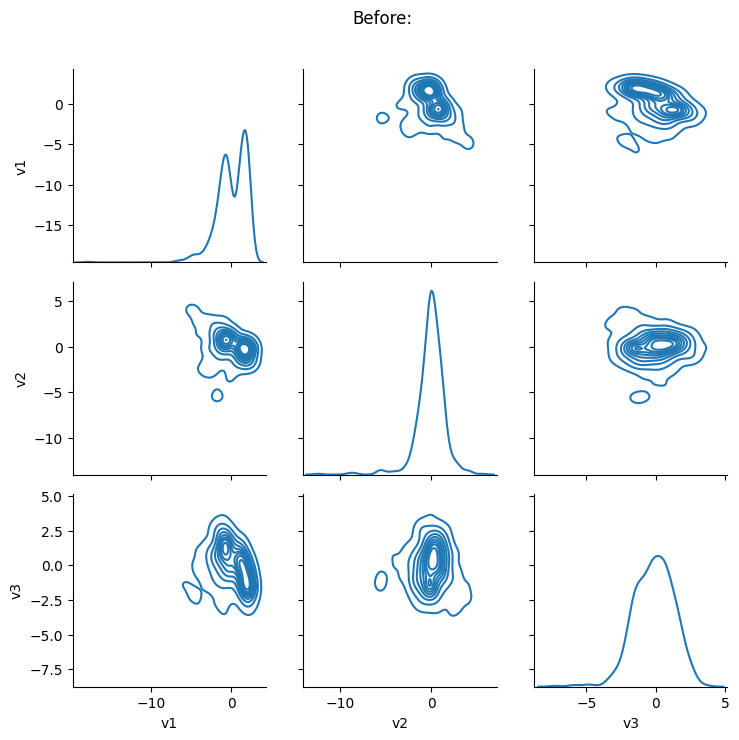

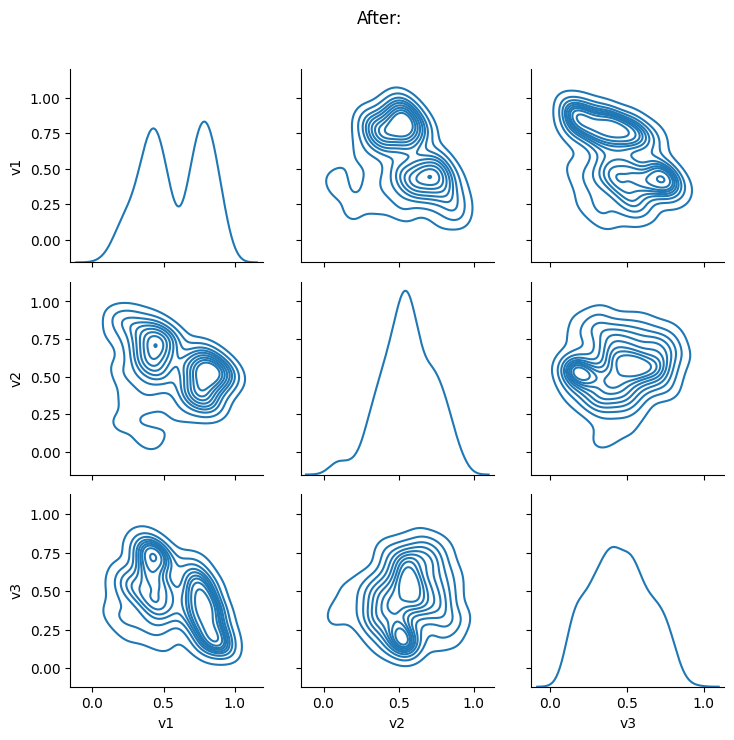

In [25]:
# Suppress specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Fitting the pipeline to the training data to acquire normalization parameters
pipeline.fit(X_train)

# Applying the transformations using the parameters acquired from the training data
X_train_transformed = pipeline.transform(X_train)
X_validate_transformed = pipeline.transform(X_validate)

# Convert the transformed data (which is a NumPy array) back to a Pandas DataFrame
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=X_train.columns)

# Create a pair grid for the original data (Before transformation)
g_before = sns.PairGrid(X_train.iloc[:, :3].sample(600, random_state=RANDOM_SEED))
plt.subplots_adjust(top=0.9)
g_before.fig.suptitle('Before:')
g_before.map_diag(sns.kdeplot)
g_before.map_offdiag(sns.kdeplot)

# Create a pair grid for the transformed data (After transformation)
g_after = sns.PairGrid(X_train_transformed_df.iloc[:, :3].sample(600, random_state=RANDOM_SEED))
plt.subplots_adjust(top=0.9)
g_after.fig.suptitle('After:')
g_after.map_diag(sns.kdeplot)
g_after.map_offdiag(sns.kdeplot)

plt.show()


In [26]:
# Data dimensions and hyperparameters
input_dim = X_train_transformed.shape[1]  # Number of features in the training data
BATCH_SIZE = 256  # Number of samples per gradient update
EPOCHS = 100  # Number of training epochs

# Building the Autoencoder model
autoencoder = tf.keras.models.Sequential([

    # Encoder: Compress input data to lower dimensions
    tf.keras.layers.Dense(input_dim, activation='elu', input_shape=(input_dim, )),  # Input layer
    tf.keras.layers.Dense(16, activation='elu'),  # Hidden layer with 16 units
    tf.keras.layers.Dense(8, activation='elu'),   # Hidden layer with 8 units
    tf.keras.layers.Dense(4, activation='elu'),   # Hidden layer with 4 units
    tf.keras.layers.Dense(2, activation='elu'),   # Bottleneck layer (lowest dimensional representation)
    
    # Decoder: Reconstruct the data back to the original dimensions
    tf.keras.layers.Dense(4, activation='elu'),   # Expanding back with 4 units
    tf.keras.layers.Dense(8, activation='elu'),   # Expanding back with 8 units
    tf.keras.layers.Dense(16, activation='elu'),  # Expanding back with 16 units
    tf.keras.layers.Dense(input_dim, activation='elu')  # Output layer to match the input dimension
    
])

# Compile the autoencoder model
autoencoder.compile(optimizer="adam",  # Adam optimizer for efficient training
                    loss="mse",  # Mean Squared Error as the loss function
                    metrics=["acc"])  # Accuracy metric to evaluate performance

# Print an overview of the model's architecture
autoencoder.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 29)                  │             870 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 29)                  │             493 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,221 (8.68 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Get the current date and time in 'yyyymmddHHMM' format
yyyymmddHHMM = datetime.now().strftime('%Y%m%d%H%M')

# Create a new directory name for this run based on current time, batch size, and number of layers in the model
log_subdir = f'{yyyymmddHHMM}_batch{BATCH_SIZE}_layers{len(autoencoder.layers)}'

# Define early stopping to halt training when the validation loss stops improving
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss for early stopping
    min_delta=0.0001,     # Minimum change to qualify as an improvement
    patience=10,          # Number of epochs to wait for improvement before stopping
    verbose=1,            # Print progress messages
    mode='min',           # Stop when validation loss has stopped decreasing
    restore_best_weights=True  # Restore the best model weights when training stops
)

# Define model checkpoint to save the best model weights during training
save_model = tf.keras.callbacks.ModelCheckpoint(
    filepath='autoencoder_best_weights.keras',  # Use .keras extension instead of .hdf5
    save_best_only=True,  # Save only the best model based on validation loss
    monitor='val_loss',   # Monitor validation loss
    verbose=0,            # Do not print any messages on saving
    mode='min'            # Save the model when validation loss is minimized
)

# Define TensorBoard callback for visualizing training progress
tensorboard = tf.keras.callbacks.TensorBoard(
    log_dir=f'logs/{log_subdir}',  # Log directory to store TensorBoard logs
    update_freq='batch'            # Update logs after every batch (you can also set to 'epoch')
)

# List of all the callbacks
callbacks = [early_stop, save_model, tensorboard]

# Train the autoencoder model
history = autoencoder.fit(
    X_train_transformed, X_train_transformed,  # Training data (autoencoder uses input as output)
    shuffle=True,  # Shuffle the data before training
    epochs=EPOCHS,  # Number of training epochs
    batch_size=BATCH_SIZE,  # Batch size for each iteration
    callbacks=callbacks,  # List of callbacks for monitoring and saving the model
    validation_data=(X_validate_transformed, X_validate_transformed)  # Validation data for evaluation during training
)


Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - acc: 0.1690 - loss: 0.0677 - val_acc: 0.2609 - val_loss: 0.0171
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.2575 - loss: 0.0168 - val_acc: 0.2796 - val_loss: 0.0152
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.3148 - loss: 0.0148 - val_acc: 0.3427 - val_loss: 0.0145
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.3408 - loss: 0.0144 - val_acc: 0.3384 - val_loss: 0.0142
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.3386 - loss: 0.0141 - val_acc: 0.3245 - val_loss: 0.0139
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.3276 - loss: 0.0138 - val_acc: 0.3282 - val_loss: 0.0137
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.3338 - loss: 0.0137 - val_acc: 0.3411 - val_loss: 0.0137
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.3480 - loss: 0.0136 - val_acc: 0.3558 - val_loss: 0.0135
Epoch 9/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/

In [28]:
# Transform the test set with the pipeline fitted to the training set
X_test_transformed = pipeline.transform(X_test)

# Pass the transformed test set through the autoencoder to get the reconstructed result
reconstructions = autoencoder.predict(X_test_transformed)

# Calculate the mean squared error (MSE) reconstruction loss per row
# mse will be a 1D array where each entry represents the MSE for a single transaction
mse = np.mean(np.power(X_test_transformed - reconstructions, 2), axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Normalizer was fitted with feature names
  warnings.warn(


2651/2651 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [29]:
# Predicting the reconstructed values using the autoencoder model
predictions = autoencoder.predict(X_test_transformed)

# Calculating the Mean Squared Error (MSE) for each test sample
mse = np.mean(np.power(X_test_transformed - predictions, 2), axis=1)

# Creating a DataFrame to store the reconstruction errors and true class labels
error_df = pd.DataFrame({'reconstruction_error': mse,
                         'true_class': y_test})

# Summarizing the reconstruction errors
error_df.describe()

2651/2651 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


,reconstruction_error,true_class
count,84807.000000,84807.000000
mean,0.009504,0.005801
std,0.004586,0.075946
min,0.001000,0.000000
25%,0.006179,0.000000
50%,0.008595,0.000000
75%,0.012003,0.000000
max,0.045689,1.000000


## 
<a id="1"></a> 
# <p style="padding:15px;background-color:#45589c;margin:0;color:#f7f8fb;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:500">6.3 Threshold for Classification</p>  


<div style="background-color: #cad5f5; padding: 20px; border-radius: 8px;">

### Setting a Threshold for Classification

In an **unsupervised anomaly detection model** like an autoencoder, the goal is to identify data points that significantly deviate from normal patterns. After training the model, we set a threshold on the reconstruction error to classify anomalies.

#### Threshold Setting Methods

1. **Percentiles**  
   We can set the threshold by selecting the top x% of the dataset with the highest reconstruction errors and labeling them as anomalies. This helps balance false positives and false negatives.

2. **Modified Z-score (MAD)**  
   Another method is using the **Median Absolute Deviation (MAD)**, which is more robust to outliers than percentiles. It provides a scalable way to detect anomalies without being influenced by extreme values.

#### Why Use This Model?

The autoencoder is effective for **fraud detection** where the majority of transactions are normal. It learns normal data patterns and highlights anomalous transactions with high reconstruction errors, all without requiring labeled data.


In [30]:
THRESHOLD = 3

def mad_score(points):
    """Calculate the Modified Z-score using the Median Absolute Deviation (MAD).
    
    Args:
        points (array-like): Array of data points to calculate MAD for.
        
    Returns:
        np.ndarray: The modified Z-scores for the data points.
    """
    # Compute the median of the points
    median = np.median(points)
    
    # Calculate the absolute deviations from the median
    abs_deviation = np.abs(points - median)
    
    # Compute the MAD (Median Absolute Deviation)
    mad = np.median(abs_deviation)
    
    # Return the Modified Z-scores using the constant 0.6745
    return 0.6745 * abs_deviation / mad

# Calculate the MAD scores for reconstruction errors (mse)
z_scores = mad_score(mse)

# Identify the outliers based on the threshold
outliers = z_scores > THRESHOLD

# Output the results
outliers_count = np.sum(outliers)
total_count = np.size(z_scores)
outliers_percentage = outliers_count / total_count * 100

print(f"Detected {outliers_count:,} outliers in a total of {total_count:,} transactions "
      f"({outliers_percentage:.2f}%).")


Detected 1,871 outliers in a total of 84,807 transactions (2.21%).


In [31]:
# Get the confusion matrix for the true labels and predicted outliers
cm = confusion_matrix(y_test, outliers)

# Extract true/false positives and negatives from the confusion matrix
tn, fp, fn, tp = cm.flatten()

# Calculate precision and recall
precision = tp / (fp + tp) if (fp + tp) > 0 else 0  # Avoid division by zero
recall = tp / (fn + tp) if (fn + tp) > 0 else 0  # Avoid division by zero

# Output the classification results
print(f"""
The classifications using the MAD method with threshold={THRESHOLD} are as follows:
Confusion Matrix:
{cm}

- Percentage of transactions labeled as fraud that were correct (Precision): {precision:.2%}
- Percentage of fraudulent transactions successfully detected (Recall): {recall:.2%}
""")



The classifications using the MAD method with threshold=3 are as follows:
Confusion Matrix:
[[82798  1517]
 [  138   354]]

- Percentage of transactions labeled as fraud that were correct (Precision): 18.92%
- Percentage of fraudulent transactions successfully detected (Recall): 71.95%



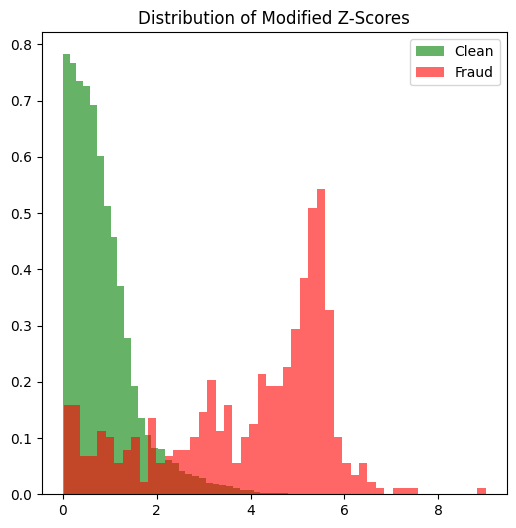

In [32]:
# Separate the z-scores for clean and fraud transactions
clean = z_scores[y_test == 0]
fraud = z_scores[y_test == 1]

# Plotting the distribution of z-scores
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the clean transactions (green)
ax.hist(clean, bins=50, density=True, label="Clean", alpha=0.6, color="green")

# Plot the fraud transactions (red)
ax.hist(fraud, bins=50, density=True, label="Fraud", alpha=0.6, color="red")

# Adding title and legend
plt.title("Distribution of Modified Z-Scores")
plt.legend(loc="best")

# Display the plot
plt.show()


In [33]:
# We're using the first 5 layers of the autoencoder to create a model for dimensionality reduction.
encoder = tf.keras.models.Sequential(autoencoder.layers[:5])
encoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 29)                  │             870 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,532 (5.98 KB)

 Trainable params: 1,532 (5.98 KB)

 Non-trainable params: 0 (0.00 B)

<div style="background-color: #cad5f5; padding: 20px; border-radius: 8px;">

## Conclusion: Outlier Detection for Fraudulent Transaction Detection

This document explores the use of an **autoencoder-based** approach for detecting fraudulent transactions in a dataset. The autoencoder model is trained to reconstruct normal (non-fraudulent) transactions, and anomalies are detected based on the reconstruction error. By setting a threshold on the **modified Z-score** of the reconstruction error, transactions are classified as either normal or fraudulent. This unsupervised approach works well in scenarios where labeled data is unavailable and allows for anomaly detection without prior knowledge of fraud labels.

In addition to the autoencoder, we applied three outlier detection models: **Isolation Forest**, **Local Outlier Factor (LOF)**, and **One-Class SVM**. These models are unsupervised and identify transactions that deviate significantly from normal behavior. While these models achieved high accuracy (around 95%), their performance in fraud detection was suboptimal. The models tended to classify most fraudulent transactions as normal, which is a result of the class imbalance where fraudulent transactions are rare. The low precision scores for fraud detection indicate that the models struggled to effectively identify the minority class of fraudulent transactions.

In conclusion, although the models performed well in terms of accuracy, they were ineffective at detecting fraud due to the class imbalance. We recommend **class balancing techniques** such as **SMOTE** or undersampling, evaluating performance with metrics like **Precision-Recall curves**, and possibly employing **ensemble-based anomaly detection methods**. By addressing the imbalance and improving the evaluation strategies, the performance of these models in detecting fraudulent transactions can be significantly enhanced.
